In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results.left_hand_landmarks.landmark

[x: 0.76787233
y: 0.6071164
z: 2.6843415e-07
, x: 0.6938616
y: 0.5926804
z: -0.0061745406
, x: 0.6469805
y: 0.55624646
z: 0.0026659067
, x: 0.62021995
y: 0.51431674
z: 0.009189248
, x: 0.6079718
y: 0.4686717
z: 0.018261785
, x: 0.6885451
y: 0.46341947
z: 0.053730574
, x: 0.65909594
y: 0.40779606
z: 0.06766233
, x: 0.64179075
y: 0.37688187
z: 0.06932237
, x: 0.62921983
y: 0.3508329
z: 0.06957459
, x: 0.7213504
y: 0.44492686
z: 0.055987403
, x: 0.70275706
y: 0.3886147
z: 0.08222007
, x: 0.6880421
y: 0.35248208
z: 0.08860049
, x: 0.6757096
y: 0.32792446
z: 0.091409095
, x: 0.7544582
y: 0.43665767
z: 0.0519282
, x: 0.74923605
y: 0.38046333
z: 0.07440154
, x: 0.7440585
y: 0.34152582
z: 0.083335266
, x: 0.73979753
y: 0.30877692
z: 0.086923
, x: 0.7897323
y: 0.4384047
z: 0.044167973
, x: 0.7972603
y: 0.39096332
z: 0.06058686
, x: 0.79524
y: 0.36371082
z: 0.06974811
, x: 0.7932488
y: 0.33676764
z: 0.07612835
]

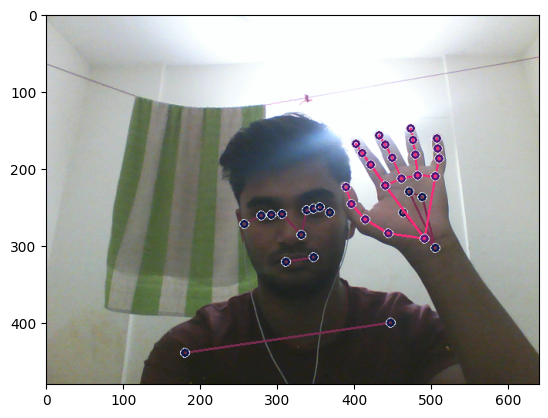

In [11]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [15]:
result_test = extract_keypoints(results)
result_test

array([ 5.18591821e-01,  5.96151650e-01, -9.51804936e-01,  9.99922693e-01,
        5.29527009e-01,  5.30353248e-01, -8.83484185e-01,  9.99868095e-01,
        5.42452276e-01,  5.26239216e-01, -8.83169293e-01,  9.99881923e-01,
        5.55181742e-01,  5.22313237e-01, -8.82704377e-01,  9.99853432e-01,
        4.78377104e-01,  5.39861083e-01, -8.92735183e-01,  9.99862909e-01,
        4.56303984e-01,  5.42564511e-01, -8.91626179e-01,  9.99862194e-01,
        4.36957747e-01,  5.45706689e-01, -8.91817451e-01,  9.99855042e-01,
        5.76228023e-01,  5.35636067e-01, -4.38014179e-01,  9.99876738e-01,
        4.03074980e-01,  5.67834914e-01, -4.59463030e-01,  9.99906063e-01,
        5.43734252e-01,  6.56740189e-01, -7.84586072e-01,  9.99896765e-01,
        4.87333775e-01,  6.70793355e-01, -7.91922987e-01,  9.99903560e-01,
        6.99431002e-01,  8.33874404e-01, -2.03450114e-01,  9.98579979e-01,
        2.81459212e-01,  9.14969265e-01, -1.64803535e-01,  9.97309268e-01,
        9.79027152e-01,  

In [16]:
33*4+21*3+21*3

258

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 5.18591821e-01,  5.96151650e-01, -9.51804936e-01,  9.99922693e-01,
        5.29527009e-01,  5.30353248e-01, -8.83484185e-01,  9.99868095e-01,
        5.42452276e-01,  5.26239216e-01, -8.83169293e-01,  9.99881923e-01,
        5.55181742e-01,  5.22313237e-01, -8.82704377e-01,  9.99853432e-01,
        4.78377104e-01,  5.39861083e-01, -8.92735183e-01,  9.99862909e-01,
        4.56303984e-01,  5.42564511e-01, -8.91626179e-01,  9.99862194e-01,
        4.36957747e-01,  5.45706689e-01, -8.91817451e-01,  9.99855042e-01,
        5.76228023e-01,  5.35636067e-01, -4.38014179e-01,  9.99876738e-01,
        4.03074980e-01,  5.67834914e-01, -4.59463030e-01,  9.99906063e-01,
        5.43734252e-01,  6.56740189e-01, -7.84586072e-01,  9.99896765e-01,
        4.87333775e-01,  6.70793355e-01, -7.91922987e-01,  9.99903560e-01,
        6.99431002e-01,  8.33874404e-01, -2.03450114e-01,  9.98579979e-01,
        2.81459212e-01,  9.14969265e-01, -1.64803535e-01,  9.97309268e-01,
        9.79027152e-01,  

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Point_Dataset') 

# Actions that we try to detect
actions = np.array(['forward', 'backward', 'pause-play','full-screen','normal-screen'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()